### Необходимо:

1) Сделать аналитический отчет о работе проекта на протяжении периода выборки и описать результаты (кратко о главном).


In [47]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

### onehot encoder

In [48]:
from sklearn.feature_extraction import DictVectorizer

def encode_onehot(df, cols):
    vec = DictVectorizer()
    
    vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict(orient='records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = df.index
    
    df = df.drop(cols, axis=1)
    df = df.join(vec_data)
    return df

### Data import

In [49]:
data1 = pd.read_csv('data1.csv', delimiter=';')
data2 = pd.read_csv('data2.csv', delimiter=';')
data3 = pd.read_csv('data3.csv', delimiter=';')

# bug with encoding in files
data1 = data1.rename(index=str, columns={"\ufeffID": "ID"})
data2 = data2.rename(index=str, columns={"\ufeffID": "ID"})
data3 = data3.rename(index=str, columns={"\ufeffID": "ID"})

df_list = [('data1', data1), ('data2', data2), ('data3', data3)]

#### data1
* ID – идентификатор юзера 
* RegDate – дата регистрации юзера 
* RegCountry – страна юзера 
* RegSource – источник регистрации (SE – поисковики, WM – партнерский (покупной) трафик)

#### data2
* ID – идентификатор юзера
* DepDate – дата депозита юзера
* Sum – сумма депозита (дол)
* PaymInstr - платежный инструмент

#### data3
* ID – идентификатор юзера
* GameDate – день игры
* GameHour – час игры (1-24; 2 – значит промежуток времени от 02:00:00 до 02:59:59)
* SumRevA – сумма дохода от продукта А
* SumRevB – сумма дохода от продукта B

In [50]:
#data1.info()
data1['RegDate'] = pd.to_datetime(data1['RegDate'])
print('\nData1')
data1.head()


Data1


,ID,RegDate,RegCountry,RegSource
0,721,2016-01-01,B,SE
1,722,2016-01-01,A,SE
2,723,2016-01-01,A,SE
3,724,2016-01-01,A,SE
4,841,2016-01-01,A,SE


In [51]:
#data2.info()
data2['Sum'] = data2['Sum'].apply(lambda x: float(x.replace(',', '.')))
data2['DepDate'] = pd.to_datetime(data2['DepDate'])
print('\nData2')
data2.head()


Data2


,ID,DepDate,Sum,PaymInstr
0,620,2016-01-03,3.068497,Other
1,620,2016-01-03,3.945210,Other
2,620,2016-01-03,4.208224,Other
3,620,2016-01-02,2.630140,Other
4,620,2016-01-02,1.753427,Other


In [52]:
#data3.info()
data3['SumRevA'] = data3['SumRevA'].apply(lambda x: float(x.replace(',', '.')))
data3['SumRevB'] = data3['SumRevB'].apply(lambda x: float(x.replace(',', '.')))
data3['GameDate'] = pd.to_datetime(data3['GameDate'])
print('\nData3')
data3.head()


Data3


,ID,GameDate,GameHour,SumRevA,SumRevB
0,7315,2016-05-24,7,0.019182,0.000000
1,154563,2016-12-23,20,17.333760,-15.338875
2,37537,2016-09-19,18,0.019182,0.000000
3,4629,2016-02-25,18,0.000000,0.000000
4,4583,2016-02-12,3,9.641944,0.000000


In [53]:
print('DATA VARIABLES\n')

for name, df in df_list:
    print('='*30)
    print(name)
    categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
    numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
    print('\ncategogical columns:')
    print(categorical_columns)
    print('\nnumerical columns:')
    print(numerical_columns)

DATA VARIABLES

data1

categogical columns:
['RegCountry', 'RegSource']

numerical columns:
['ID', 'RegDate']
data2

categogical columns:
['PaymInstr']

numerical columns:
['ID', 'DepDate', 'Sum']
data3

categogical columns:
[]

numerical columns:
['ID', 'GameDate', 'GameHour', 'SumRevA', 'SumRevB']


## Data1 analysis

In [54]:
data1.head()

,ID,RegDate,RegCountry,RegSource
0,721,2016-01-01,B,SE
1,722,2016-01-01,A,SE
2,723,2016-01-01,A,SE
3,724,2016-01-01,A,SE
4,841,2016-01-01,A,SE


In [55]:
data1.info()

print('\n' + '*'*30)
print('Number of unique IDs: %d' % len(data1['ID'].unique()))
print('\n' + '*'*30)
print('Unique RegCountry:')
print(data1['RegCountry'].unique())
print('\n' + '*'*30)
print('Unique RegSource:')
print(data1['RegSource'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 376902 entries, 0 to 376901
Data columns (total 4 columns):
ID            376902 non-null int64
RegDate       376902 non-null datetime64[ns]
RegCountry    376902 non-null object
RegSource     376902 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.4+ MB

******************************
Number of unique IDs: 376902

******************************
Unique RegCountry:
['B' 'A' 'C']

******************************
Unique RegSource:
['SE' 'WM']


#### RegCountry and RegSource histograms

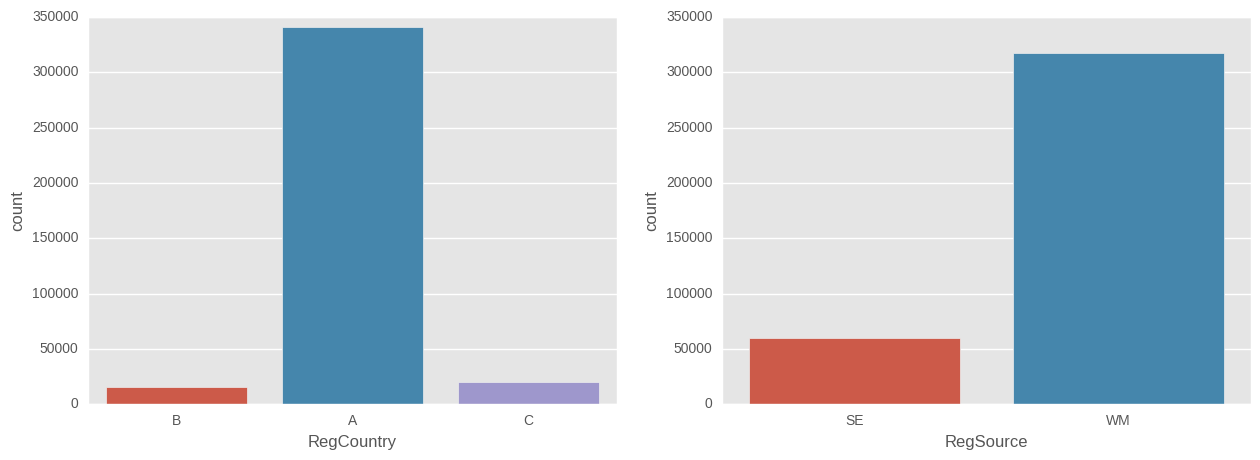

In [56]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))

sns.countplot(x='RegCountry', data=data1, ax=axis1)
sns.countplot(x='RegSource', data=data1, ax=axis2)

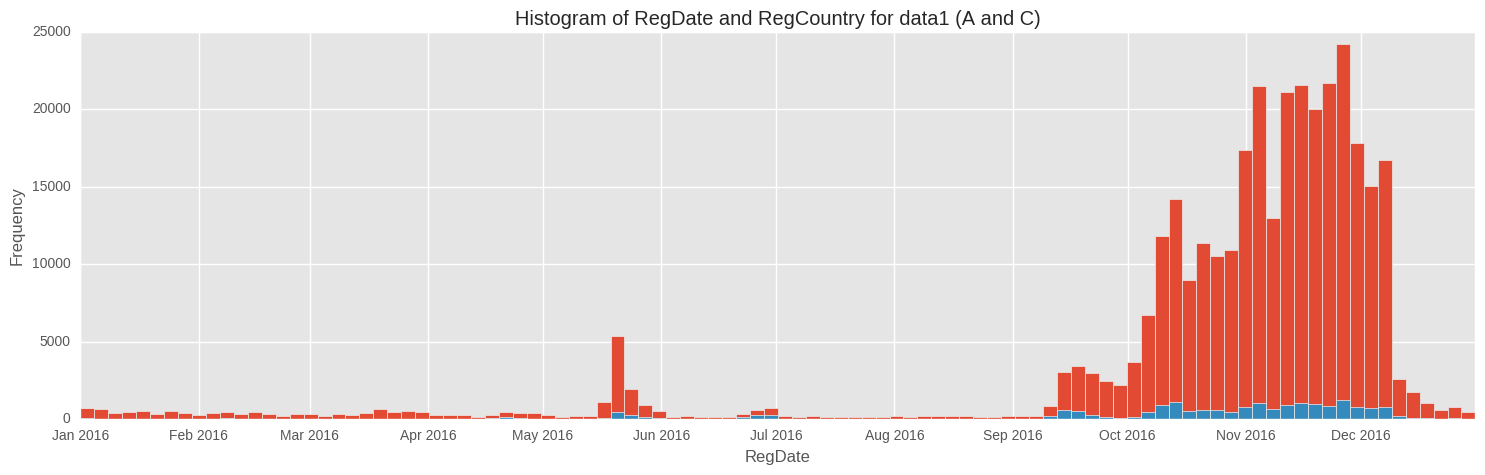

In [57]:
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(111)


data1[data1['RegCountry'] == 'A']['RegDate'].hist(bins=100)
data1[data1['RegCountry'] == 'C']['RegDate'].hist(bins=100)

plt.xlabel('RegDate')
plt.ylabel('Frequency')
plt.title('Histogram of RegDate and RegCountry for data1 (A and C)')

#### RegDate histograms

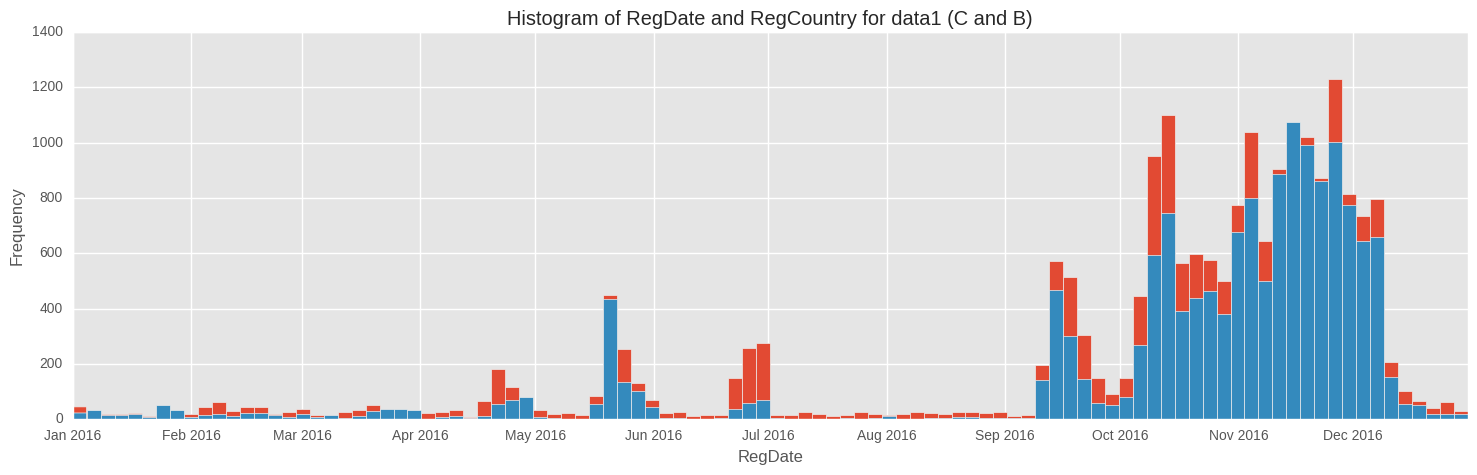

In [58]:
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(111)


data1[data1['RegCountry'] == 'C']['RegDate'].hist(bins=100)
data1[data1['RegCountry'] == 'B']['RegDate'].hist(bins=100)

plt.xlabel('RegDate')
plt.ylabel('Frequency')
plt.title('Histogram of RegDate and RegCountry for data1 (C and B)')

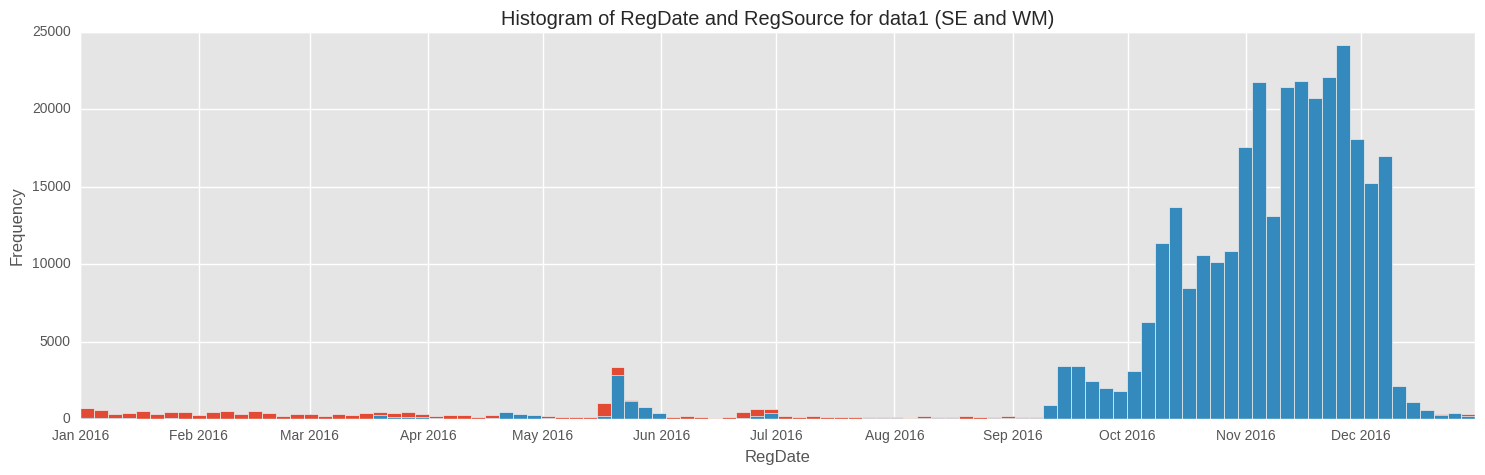

In [59]:
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(111)

data1[data1['RegSource'] == 'SE']['RegDate'].hist(bins=100)
data1[data1['RegSource'] == 'WM']['RegDate'].hist(bins=100)

plt.xlabel('RegDate')
plt.ylabel('Frequency')
plt.title('Histogram of RegDate and RegSource for data1 (SE and WM)')

#### onehot encoding data1 to check correlation beetwen categorical features

In [60]:
data1_enc = encode_onehot(data1, ['RegCountry','RegSource'])

In [61]:
data1_enc.head()

,ID,RegDate,RegCountry=A,RegCountry=B,RegCountry=C,RegSource=SE,RegSource=WM
0,721,2016-01-01,0.0,1.0,0.0,1.0,0.0
1,722,2016-01-01,1.0,0.0,0.0,1.0,0.0
2,723,2016-01-01,1.0,0.0,0.0,1.0,0.0
3,724,2016-01-01,1.0,0.0,0.0,1.0,0.0
4,841,2016-01-01,1.0,0.0,0.0,1.0,0.0


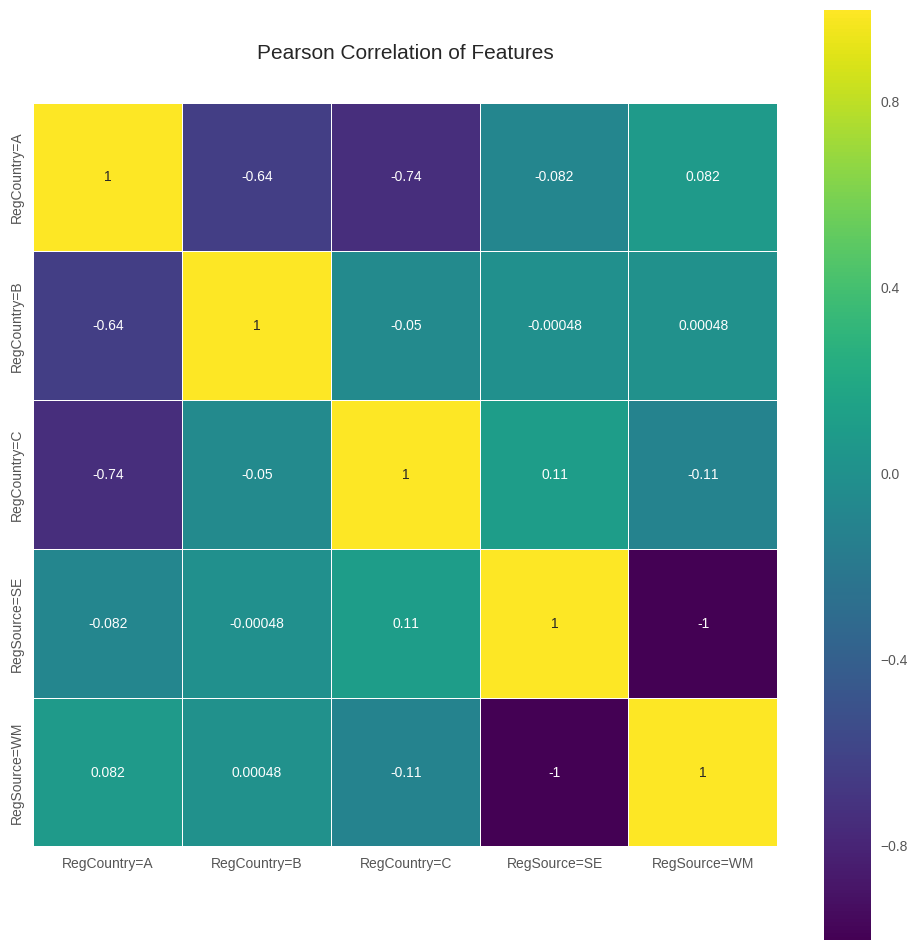

In [62]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data1_enc[['RegCountry=A','RegCountry=B','RegCountry=C','RegSource=SE','RegSource=WM']].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

as you see there are no correlation

### Data2 analysis

In [63]:
data2.head()

,ID,DepDate,Sum,PaymInstr
0,620,2016-01-03,3.068497,Other
1,620,2016-01-03,3.945210,Other
2,620,2016-01-03,4.208224,Other
3,620,2016-01-02,2.630140,Other
4,620,2016-01-02,1.753427,Other


In [64]:
data2.info()

print('\n' + '*'*30)
print('Number of unique IDs: %d' % len(data2['ID'].unique()))
print('\n' + '*'*30)
print('Unique PaymInstr:')
print(data2['PaymInstr'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 169880 entries, 0 to 169879
Data columns (total 4 columns):
ID           169880 non-null int64
DepDate      169880 non-null datetime64[ns]
Sum          169880 non-null float64
PaymInstr    169880 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.5+ MB

******************************
Number of unique IDs: 22702

******************************
Unique PaymInstr:
['Other' 'Card' 'OnlineBanking' 'Mobile' 'PrePaid']


In [65]:
data2[['Sum']].describe().round(2)

,Sum
count,169880.00
mean,14.81
std,44.97
min,0.76
25%,4.14
50%,5.48
75%,10.54
max,3901.38


#### PaymInstr histograms and statistics

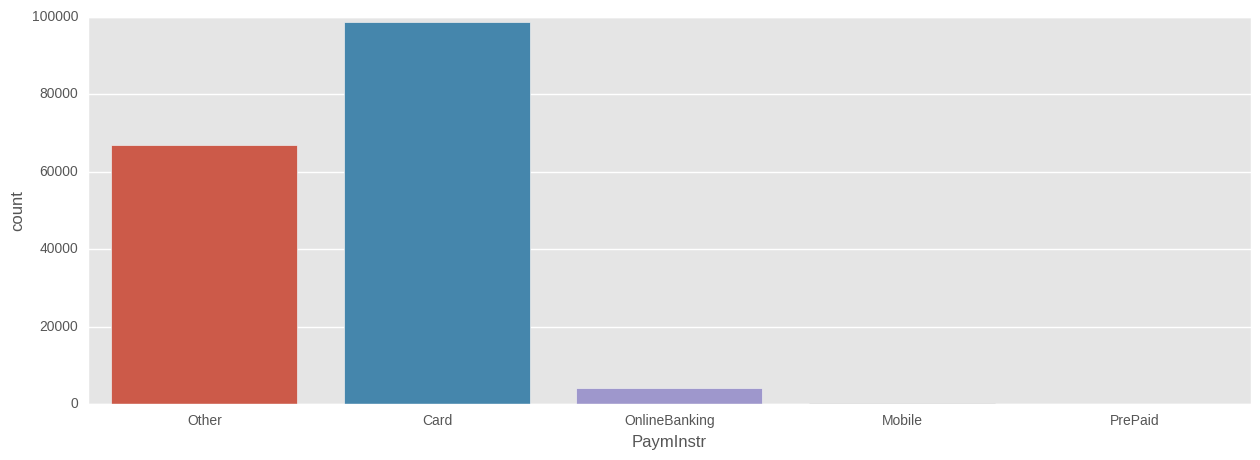

In [66]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

sns.countplot(x='PaymInstr', data=data2, ax=axis1)

In [67]:
print('Number of PaymInstr items:\n')
for item in data2['PaymInstr'].unique():
    print(item + ': ' + str(data2[data2['PaymInstr'] == item]['PaymInstr'].value_counts().get_values()[0]))

Number of PaymInstr items:

Other: 66819
Card: 98683
OnlineBanking: 4128
Mobile: 244
PrePaid: 6


In [68]:
print('Number of PaymInstr items in percent:\n')
for item in data2['PaymInstr'].unique():
    print(item + ': ' 
          + str(round(data2[data2['PaymInstr'] == item]['PaymInstr'].value_counts().get_values()[0]/len(data2),5)*100) + '%')


Number of PaymInstr items in percent:

Other: 39.333%
Card: 58.09%
OnlineBanking: 2.43%
Mobile: 0.144%
PrePaid: 0.004%


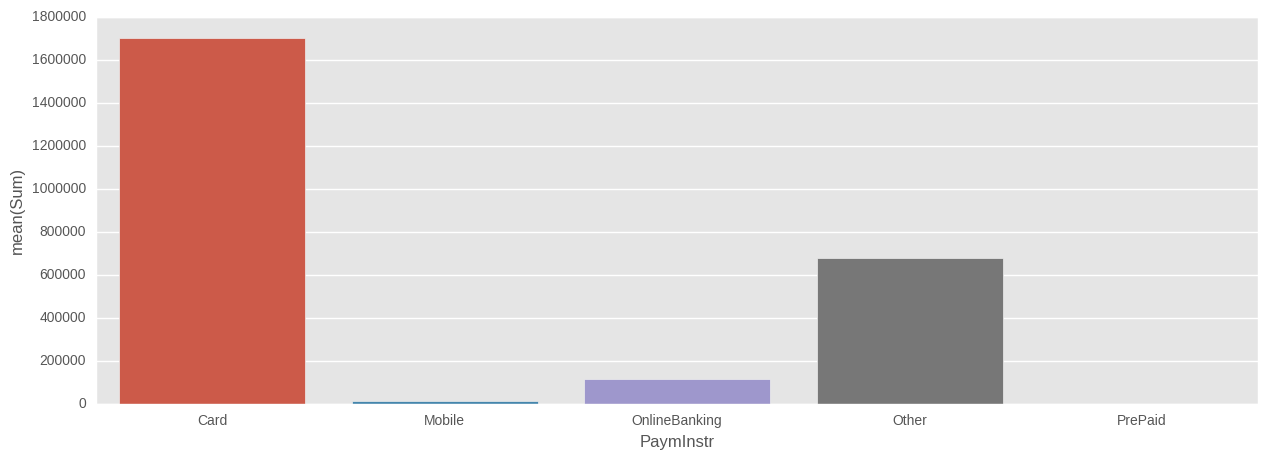

In [69]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = data2[["PaymInstr", "Sum"]].groupby(['PaymInstr'],as_index=False).sum()
sns.barplot(x='PaymInstr', y='Sum', data=embark_perc,ax=axis1)

In [70]:
print('Total Sum of PaymInstr items:\n')
for item in data2['PaymInstr'].unique():
    print(item + ': ' + str(round(data2[data2['PaymInstr'] == item]['Sum'].get_values().sum(), 2)))

Total Sum of PaymInstr items:

Other: 680701.57
Card: 1700436.27
OnlineBanking: 118424.58
Mobile: 16809.52
PrePaid: 23.6


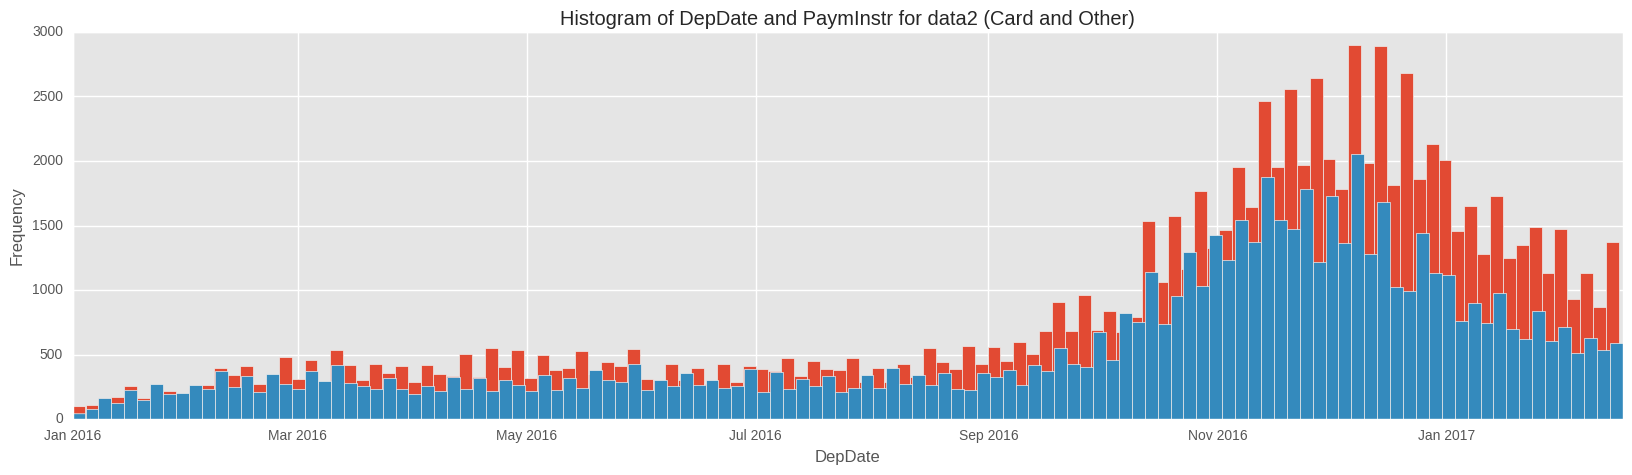

In [71]:
fig = plt.figure(figsize=(20, 5))

data2[data2['PaymInstr'] == 'Card']['DepDate'].hist(bins=120)
data2[data2['PaymInstr'] == 'Other']['DepDate'].hist(bins=120)
plt.xlabel('DepDate')
plt.ylabel('Frequency')
plt.title('Histogram of DepDate and PaymInstr for data2 (Card and Other)')

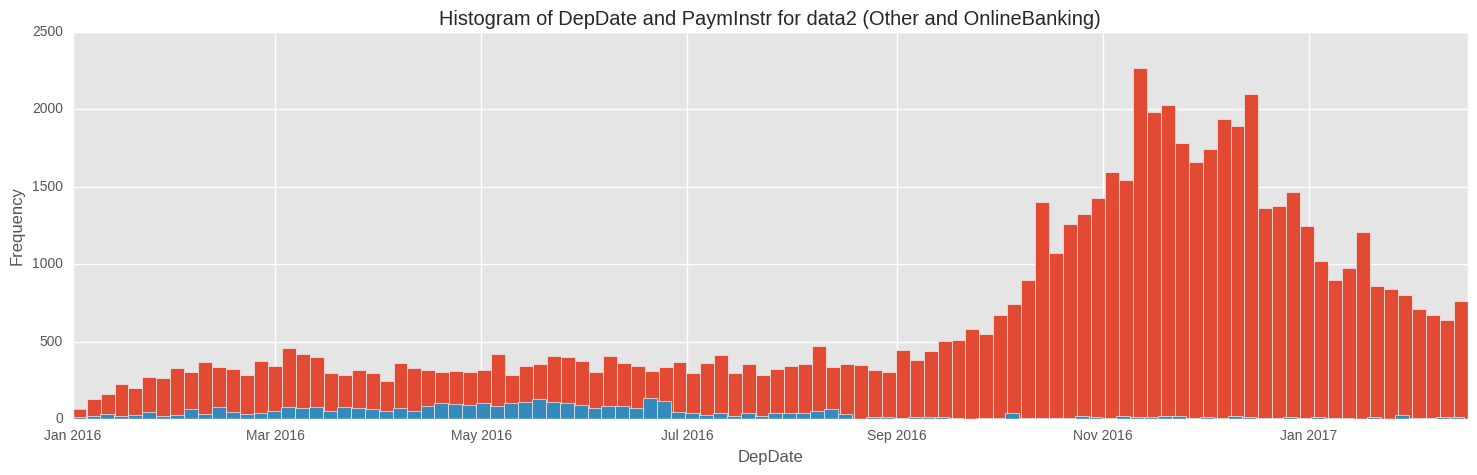

In [72]:
fig = plt.figure(figsize=(18, 5))

data2[data2['PaymInstr'] == 'Other']['DepDate'].hist(bins=100)
data2[data2['PaymInstr'] == 'OnlineBanking']['DepDate'].hist(bins=100)
plt.xlabel('DepDate')
plt.ylabel('Frequency')
plt.title('Histogram of DepDate and PaymInstr for data2 (Other and OnlineBanking)')

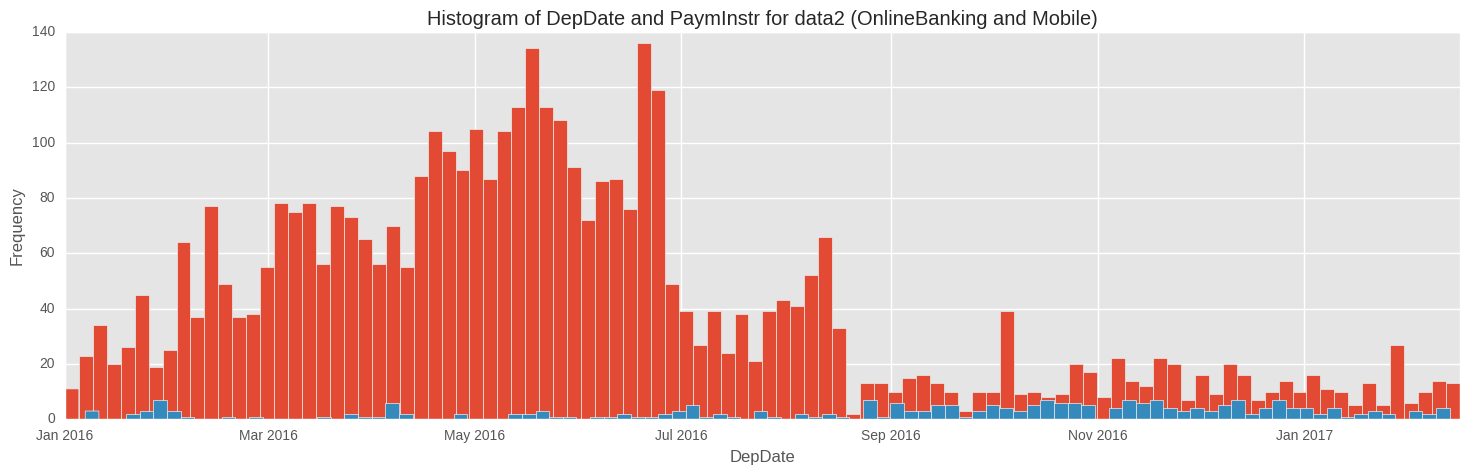

In [73]:
fig = plt.figure(figsize=(18, 5))

data2[data2['PaymInstr'] == 'OnlineBanking']['DepDate'].hist(bins=100)
data2[data2['PaymInstr'] == 'Mobile']['DepDate'].hist(bins=100)
plt.xlabel('DepDate')
plt.ylabel('Frequency')
plt.title('Histogram of DepDate and PaymInstr for data2 (OnlineBanking and Mobile)')

In [74]:
data2[data2['PaymInstr'] == 'PrePaid']

,ID,DepDate,Sum,PaymInstr
10608,2440,2016-02-16,1.372828,PrePaid
17269,4464,2016-02-08,1.653423,PrePaid
22333,2461,2016-02-08,1.653423,PrePaid
29809,6735,2016-02-29,1.277235,PrePaid
30390,7848,2016-03-17,13.503290,PrePaid
33414,6233,2016-02-22,4.144721,PrePaid


### Data3 analysis

In [75]:
data3.head()

,ID,GameDate,GameHour,SumRevA,SumRevB
0,7315,2016-05-24,7,0.019182,0.000000
1,154563,2016-12-23,20,17.333760,-15.338875
2,37537,2016-09-19,18,0.019182,0.000000
3,4629,2016-02-25,18,0.000000,0.000000
4,4583,2016-02-12,3,9.641944,0.000000


In [76]:
data3.info()

print('\n' + '*'*30)
print('Number of unique IDs: %d' % len(data3['ID'].unique()))
print('\n' + '*'*30)
print('Unique GameHour length:')
print(len(data3['GameHour'].unique()))

<class 'pandas.core.frame.DataFrame'>
Index: 1075780 entries, 0 to 1075779
Data columns (total 5 columns):
ID          1075780 non-null int64
GameDate    1075780 non-null datetime64[ns]
GameHour    1075780 non-null int64
SumRevA     1075780 non-null float64
SumRevB     1075780 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 49.2+ MB

******************************
Number of unique IDs: 37473

******************************
Unique GameHour length:
24


In [77]:
data3[['SumRevA', 'SumRevB']].describe().round(2)

,SumRevA,SumRevB
count,1075780.00,1075780.00
mean,0.76,0.32
std,3.47,40.88
min,0.00,-9491.64
25%,0.02,0.00
50%,0.12,0.00
75%,0.43,0.00
max,294.01,10875.94


#### GameHour histograms

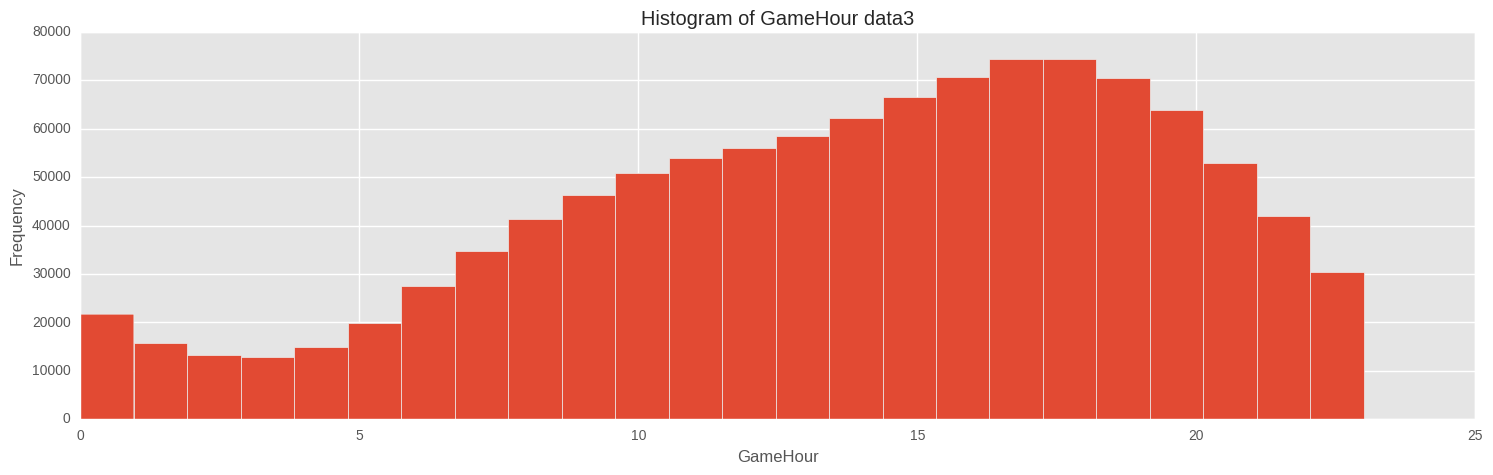

In [98]:
fig = plt.figure(figsize=(18, 5))

data3['GameHour'].hist(bins=24)
plt.xlabel('GameHour')
plt.ylabel('Frequency')
plt.title('Histogram of GameHour data3')

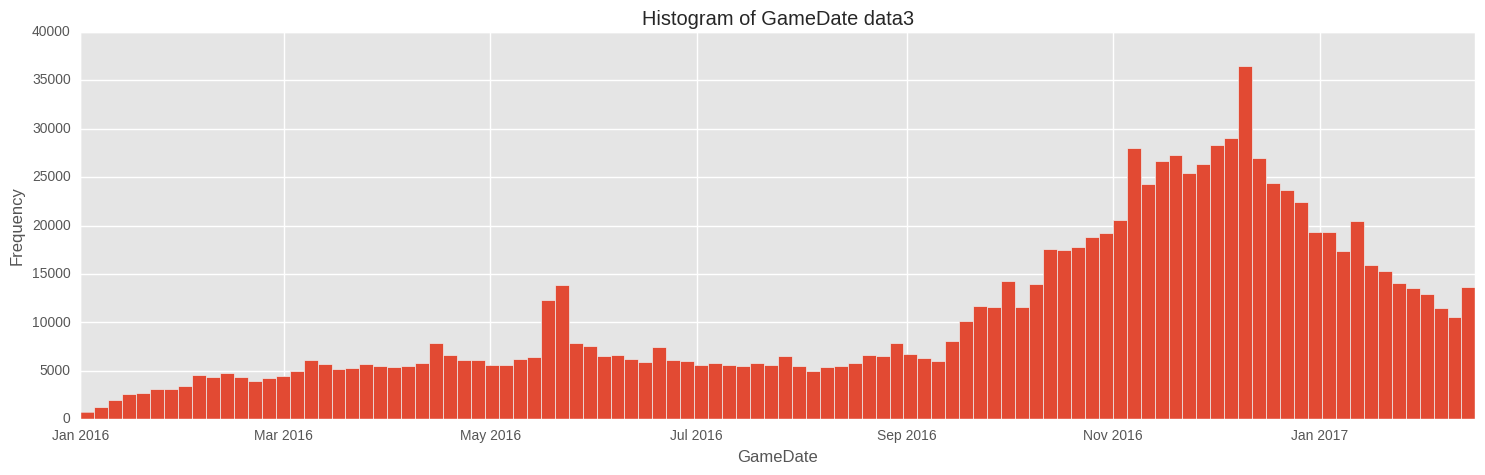

In [99]:
fig = plt.figure(figsize=(18, 5))

data3['GameDate'].hist(bins=100)
plt.xlabel('GameDate')
plt.ylabel('Frequency')
plt.title('Histogram of GameDate data3')

In [102]:
# calculate SumRevA sum per day
df = data3[["GameDate", "SumRevA"]].groupby(['GameDate'],as_index=False).sum()

In [103]:
# calculate SumRevB sum per day
df1 = data3[["GameDate", "SumRevB"]].groupby(['GameDate'],as_index=False).sum()

In [104]:
# df.head()
df1.head()

,GameDate,SumRevB
0,2016-01-01,10.946292
1,2016-01-02,-92.992327
2,2016-01-03,167.237852
3,2016-01-04,140.326087
4,2016-01-05,1.771100


#### revenue per day distribution

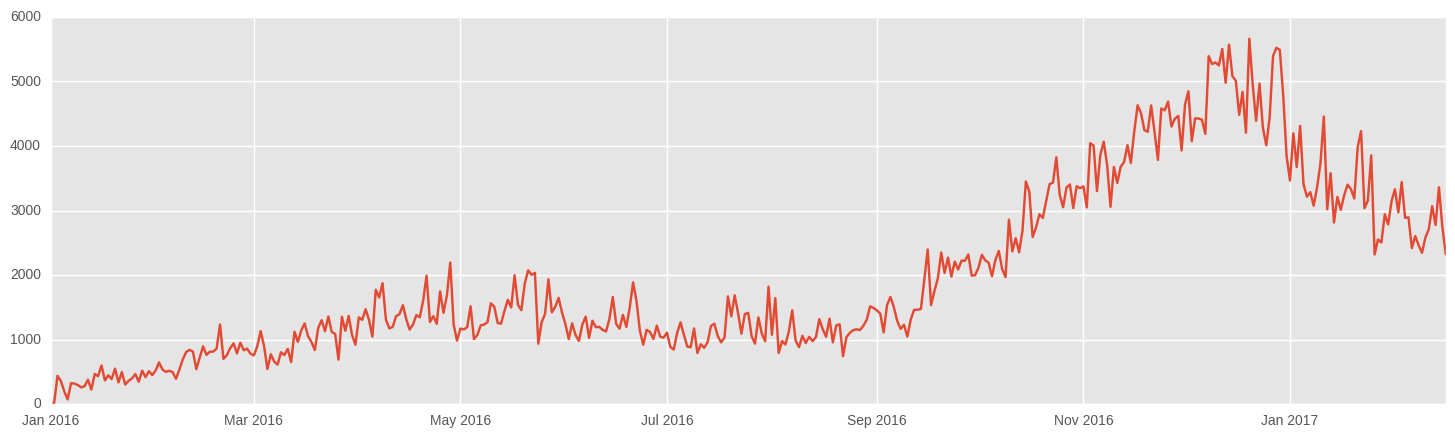

In [107]:
fig = plt.figure(figsize=(18, 5))

plt.plot(df['GameDate'], df['SumRevA'])
plt.show()

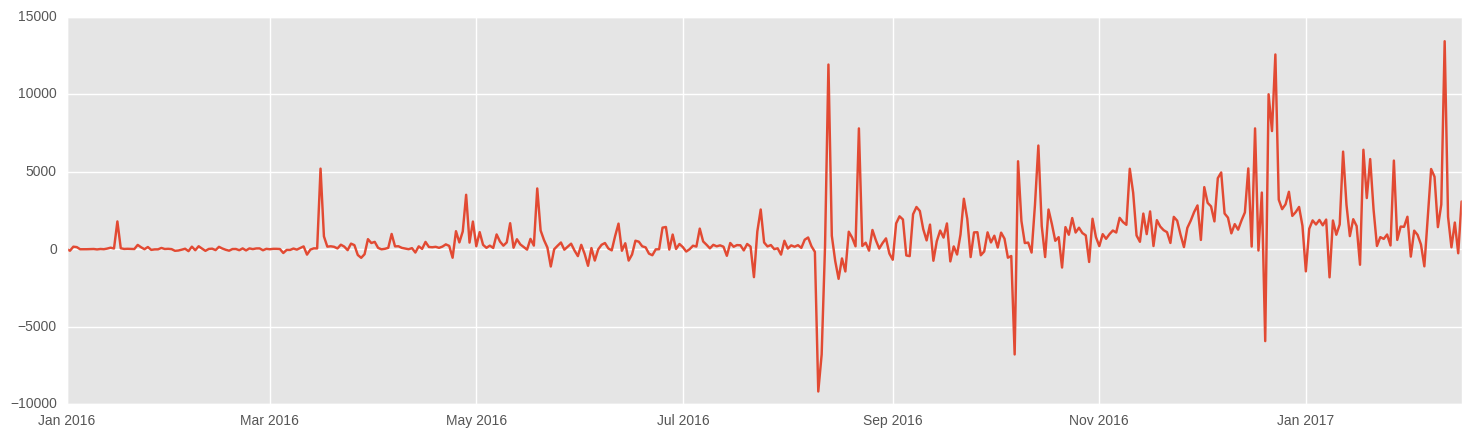

In [108]:
fig = plt.figure(figsize=(18, 5))

plt.plot(df1['GameDate'], df1['SumRevB'])
plt.show()

#### played hours and total revenue per user

In [111]:
data3['Hour_count'] = 1
df2 = data3[['ID', 'SumRevA', 'SumRevB', 'Hour_count']].groupby(['ID'],as_index=False).sum().sort_values(['Hour_count','SumRevA','SumRevB'], 
                                                                                                  ascending=[False, False, False])

In [112]:
df2.head()

,ID,SumRevA,SumRevB,Hour_count
33788,339697,361.272379,0.00000,2456
1626,5761,10354.219949,5.19821,2401
33913,340139,139.718670,0.00000,2323
1835,6427,400.920716,0.00000,2244
11131,29045,176.138107,0.00000,2036


In [120]:
print('='*30)
print('most generous users revenue:')
print(round(df2[df2['SumRevA'] > 10000].sort_values(['SumRevA'],ascending=[False])['SumRevA'].sum(), 2))
print('='*30)

most generous users revenue:
70461.76


In [119]:
print('='*30)
print('Most active users revenue:')
print(round(df2[df2['Hour_count'] > 500].sort_values(['SumRevA'],ascending=[False])['SumRevA'].sum(),2))
print('='*30)

Most active users revenue:
266690.98


In [134]:
print(' Month  ', 'total WM')
for i in range(1, 13):

    if i < 10:
        print('2016-0%d : ' % i, len(data1[(data1['RegDate'] >= '2016-0%d-01' % i)
                    & (data1['RegDate'] < '2016-0%d-01' % (i + 1)) & (data1['RegSource'] == 'WM')]))
    elif i == 12:
        print('2016-12 : ', len(data1[(data1['RegDate'] >= '2016-12-01') 
                    & (data1['RegDate'] < '2017-01-01') & (data1['RegSource'] == 'WM')]))
    else:
        print('2016-%d : ' % i, len(data1[(data1['RegDate'] >= '2016-%d-01' % i)
                    & (data1['RegDate'] < '2016-%d-01' % (i + 1)) & (data1['RegSource'] == 'WM')]))

    

 Month   total WM
2016-01 :  555
2016-02 :  171
2016-03 :  838
2016-04 :  1374
2016-05 :  5681
2016-06 :  810
2016-07 :  297
2016-08 :  535
2016-09 :  14346
2016-10 :  82645
2016-11 :  168785
2016-12 :  40995


In [135]:
data3.head()

,ID,GameDate,GameHour,SumRevA,SumRevB,Hour_count,GameDate1
0,7315,2016-05-24,7,0.019182,0.000000,1,2016-05
1,154563,2016-12-23,20,17.333760,-15.338875,1,2016-12
2,37537,2016-09-19,18,0.019182,0.000000,1,2016-09
3,4629,2016-02-25,18,0.000000,0.000000,1,2016-02
4,4583,2016-02-12,3,9.641944,0.000000,1,2016-02


In [136]:
data3['GameDate1'] = data3['GameDate'].apply(lambda x: str(x)[:7])

In [137]:
data3.head()

,ID,GameDate,GameHour,SumRevA,SumRevB,Hour_count,GameDate1
0,7315,2016-05-24,7,0.019182,0.000000,1,2016-05
1,154563,2016-12-23,20,17.333760,-15.338875,1,2016-12
2,37537,2016-09-19,18,0.019182,0.000000,1,2016-09
3,4629,2016-02-25,18,0.000000,0.000000,1,2016-02
4,4583,2016-02-12,3,9.641944,0.000000,1,2016-02


In [138]:
df = data3[['ID', "GameDate1", "SumRevA", "SumRevB"]].groupby(['ID', 'GameDate1'], as_index=False).sum()

In [139]:
df['return'] = df['SumRevA'].apply(lambda x: 0.05*x if x < 100 else 0.1*x if x < 1000 else 0.15*x if x < 10000 else 0.2*x)

In [140]:
df['return1'] = df['SumRevB'].apply(lambda x: 0.05*x if x < 100 else 0.1*x if x < 1000 else 0.15*x if x < 10000 else 0.2*x)

In [141]:
for i in range(1, 13):
    if i < 10:
        tmp = df[(df['GameDate1'] == '2016-0%d' % i)]['return1'].sum()
    else:
        tmp = df[(df['GameDate1'] == '2016-%d' % i)]['return1'].sum()
    print(round(tmp,2))

360.94
21.29
1025.39
1462.07
1660.15
854.2
906.64
1260.03
4038.91
3438.18
5365.8
15256.27


In [142]:
for i in range(1, 13):
    if i < 10:
        tmp = df[(df['GameDate1'] == '2016-0%d' % i)]['SumRevB'].sum()
    else:
        tmp = df[(df['GameDate1'] == '2016-%d' % i)]['SumRevB'].sum()
    print(round(tmp,2))

3062.44
159.22
7269.1
11943.14
13286.68
5487.65
7694.79
7711.26
26455.92
28738.93
46183.5
96444.58
